-----

# Análisis para Zuber: Patrones de Viajes en Chicago
**Autor:** Daniel Ramírez Martínez  
**Fecha:** 15 de Marzo de 2025  

## Introducción

En el presente análisis se examinan de manera detallada los patrones de viajes en la ciudad de Chicago, focalizando la evaluación en datos históricos de viajes en taxi y condiciones climáticas. Como analista en Zuber, una innovadora empresa de viajes compartidos, mi objetivo es identificar tendencias y comportamientos en la preferencia de los usuarios, así como evaluar el impacto de factores externos —principalmente el clima— en la frecuencia y duración de los viajes.

El análisis se estructura en dos grandes etapas. Primero, se lleva a cabo un análisis exploratorio (EDA) para identificar las empresas líderes en el sector y los barrios con mayor demanda. En esta fase se exploran datasets que abarcan desde el número de viajes por empresa hasta el promedio de viajes por barrio, permitiendo una visión integral del mercado. En la segunda etapa, se prueba la hipótesis de que "la duración promedio de los viajes desde el Loop al Aeropuerto O’Hare difiere en sábados lluviosos", aplicando métodos estadísticos que permiten contrastar la variabilidad en la duración de los viajes bajo diferentes condiciones climáticas.

Mediante el uso de herramientas avanzadas de análisis de datos (como pandas, matplotlib, seaborn y scipy), este análisis no solo busca evidenciar diferencias significativas en el comportamiento de los usuarios, sino también extraer conclusiones que puedan orientar decisiones estratégicas en la operación de la flota, la gestión de precios dinámicos y la comunicación con los usuarios en días de condiciones meteorológicas adversas. Así, se pretende optimizar tanto la experiencia del usuario como la eficiencia operativa de Zuber.

## Objetivos:

1. Realizar un análisis exploratorio (EDA) para identificar empresas líderes y barrios con mayor demanda.

2. Probar la hipótesis: "La duración promedio de viajes desde el Loop al Aeropuerto O’Hare difiere en sábados lluviosos".

## Datos Utilizados:

project_sql_result_01.csv: Viajes por empresa (15-16 Nov 2017).

project_sql_result_04.csv: Promedio de viajes por barrio (Nov 2017).

project_sql_result_07.csv: Viajes Loop → O’Hare con condiciones climáticas.

### Importar Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Análisis Exploratorio

#### Importar Datos

In [2]:
# Cargar datasets
df_empresas = pd.read_csv('/datasets/project_sql_result_01.csv')  # Empresas
df_barrios = pd.read_csv('/datasets/project_sql_result_04.csv')   # Barrios

#### Inspección Inicial

In [3]:
# Ver primeras filas y tipos de datos
print("Empresas:\n", df_empresas.head())
print("\nBarrios:\n", df_barrios.head())

# Estadísticas descriptivas
print("\nResumen Empresas:\n", df_empresas.describe())
print("\nResumen Barrios:\n", df_barrios.describe())

Empresas:
                       company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Barrios:
   dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Resumen Empresas:
        trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Resumen Barrios:
        average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


#### Limpieza y Preparación

In [4]:
# Convertir promedio de viajes a entero
df_barrios['average_trips'] = df_barrios['average_trips'].round().astype(int)

#### Top 10 Barrios por Finalizaciones

In [5]:
top10_barrios = df_barrios.sort_values('average_trips', ascending=False).head(10)

#### Visualizaciones

##### Gráfico 1: Top 10 Empresas

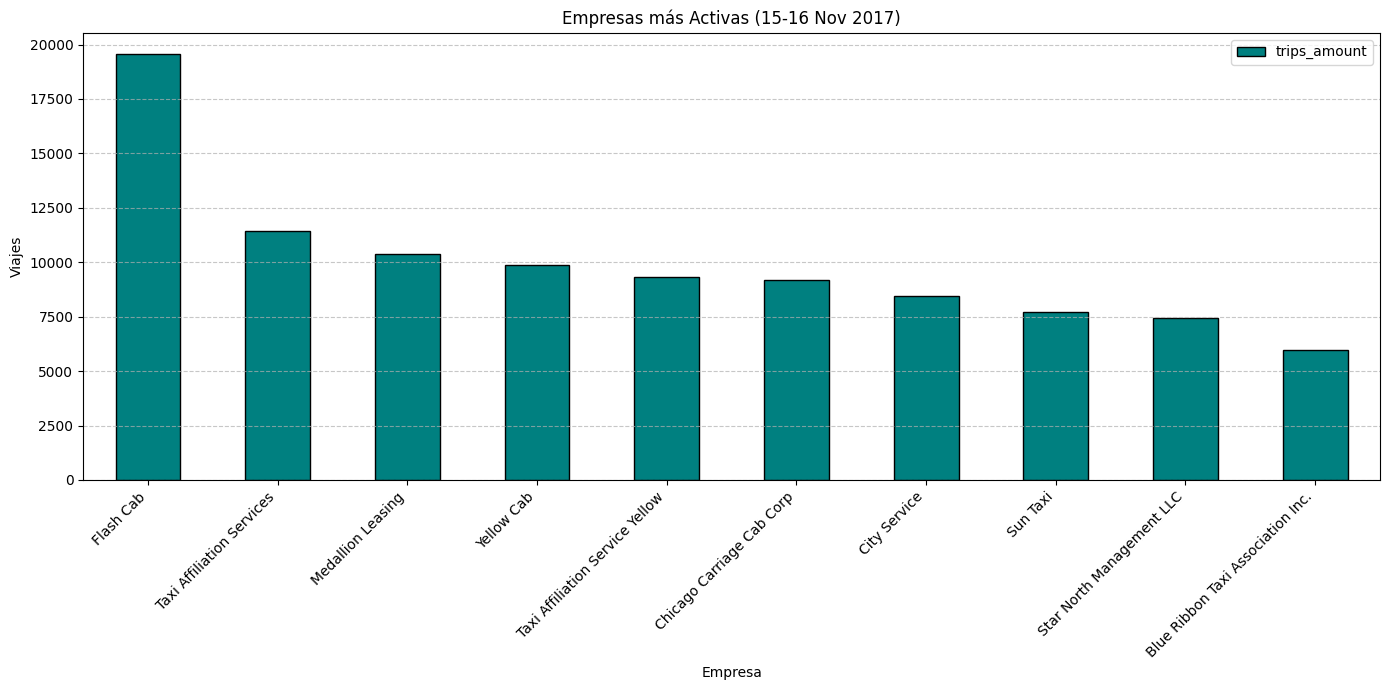

In [6]:
plt.figure(figsize=(14, 7))  # Aumenta el tamaño de la gráfica
ax = plt.gca()  # Obtiene el eje actual

df_empresas.sort_values('trips_amount', ascending=False).head(10).plot.bar(
    x='company_name', 
    y='trips_amount',
    title='Empresas más Activas (15-16 Nov 2017)',
    xlabel='Empresa',
    ylabel='Viajes',
    color='teal',
    edgecolor='black',  # Bordes en las barras
    ax=ax  # Se asigna la gráfica al eje actual
)

plt.xticks(rotation=45, ha='right')  # Rotar y alinear nombres
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agrega una cuadrícula en el eje Y
plt.tight_layout()  # Ajusta el diseño para evitar traslapes
plt.show()

##### Gráfico 2: Top 10 Barrios

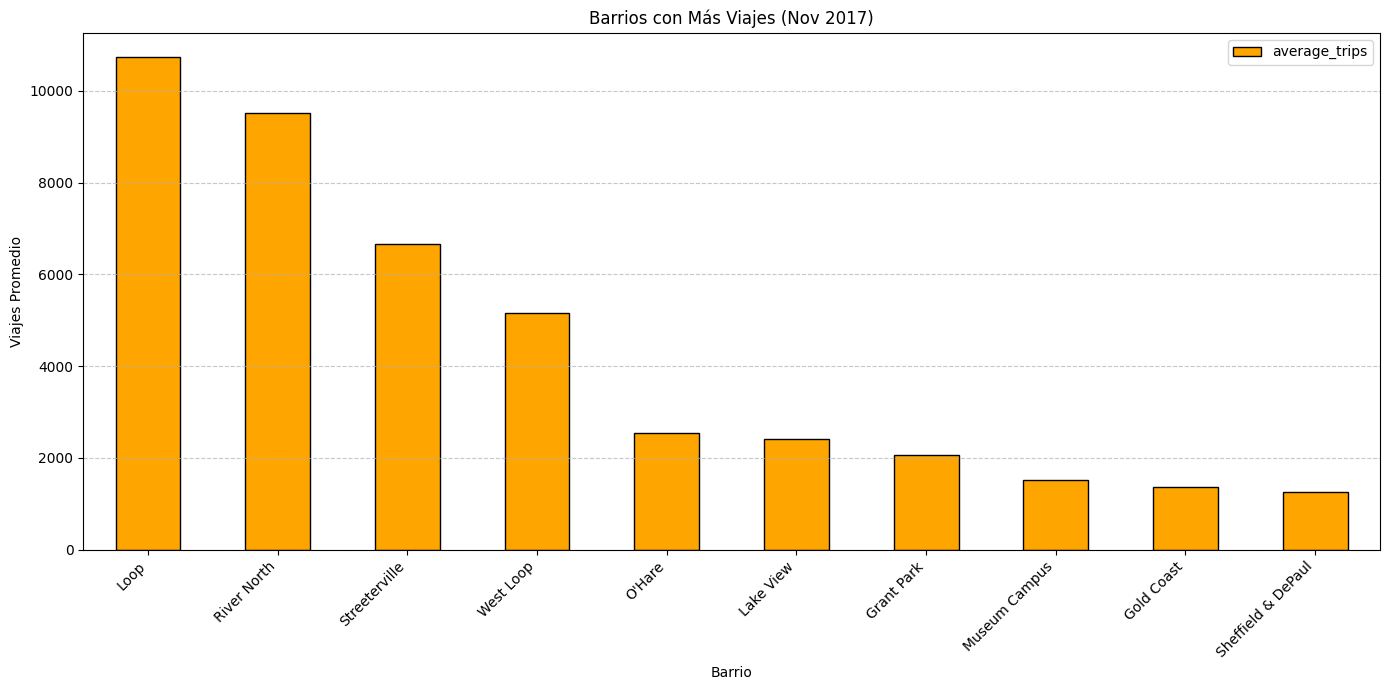

In [7]:
plt.figure(figsize=(14, 7))  # Aumenta el tamaño de la gráfica
ax = plt.gca()  # Obtiene el eje actual

top10_barrios.plot.bar(
    x='dropoff_location_name', 
    y='average_trips',
    title='Barrios con Más Viajes (Nov 2017)',
    xlabel='Barrio',
    ylabel='Viajes Promedio',
    color='orange',
    edgecolor='black',  # Bordes en las barras
    ax=ax  # Se asigna la gráfica al eje actual
)

plt.xticks(rotation=45, ha='right')  # Rotar y alinear nombres
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agrega una cuadrícula en el eje Y
plt.tight_layout()  # Ajusta el diseño para evitar traslapes
plt.show()

#### Conclusiones del EDA

* Empresas: Flash Cab y Taxi Affiliation Services lideran con diez mil viajes, superando por tres veces a la competencia.

* Barrios: El Loop (centro financiero) y River North (zona de arte y entretenimiento) son destinos principales, lo que indica una alta demanda en zonas comerciales y de transporte.

* Los viajes a Loop son de alta demanda quedando en primer lugar en el top y los viajes al aeropuerto O'Hare estan en quinto lugar. 

### Prueba de Hipótesis

#### Cargar Datos

In [8]:
df_viajes = pd.read_csv('/datasets/project_sql_result_07.csv')

#### Preparación de Datos

In [9]:
# Filtrar grupos por clima
bad_weather = df_viajes[df_viajes['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_viajes[df_viajes['weather_conditions'] == 'Good']['duration_seconds']

#### Formulación de Hipótesis

* H₀ (Nula): μ_bad = μ_good (No hay diferencia en duración promedio).

* H₁ (Alternativa): μ_bad ≠ μ_good (Existe diferencia significativa).

#### Prueba Estadística

In [10]:
# Usar prueba t de Welch (varianzas desiguales)
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=False)

alpha = 0.05
print(f"Valor p: {p_value:.4f}")
if p_value < alpha:
    print("Rechazar H₀: La duración difiere en sábados lluviosos.")
else:
    print("No hay evidencia suficiente para rechazar H₀.")
    
print(f"Duración promedio en sábados lluviosos: {bad_weather.mean():.2f} segundos")
print(f"Duración promedio en sábados no lluviosos: {good_weather.mean():.2f} segundos")

Valor p: 0.0000
Rechazar H₀: La duración difiere en sábados lluviosos.
Duración promedio en sábados lluviosos: 2427.21 segundos
Duración promedio en sábados no lluviosos: 1999.68 segundos


##### Visualización de las medias 

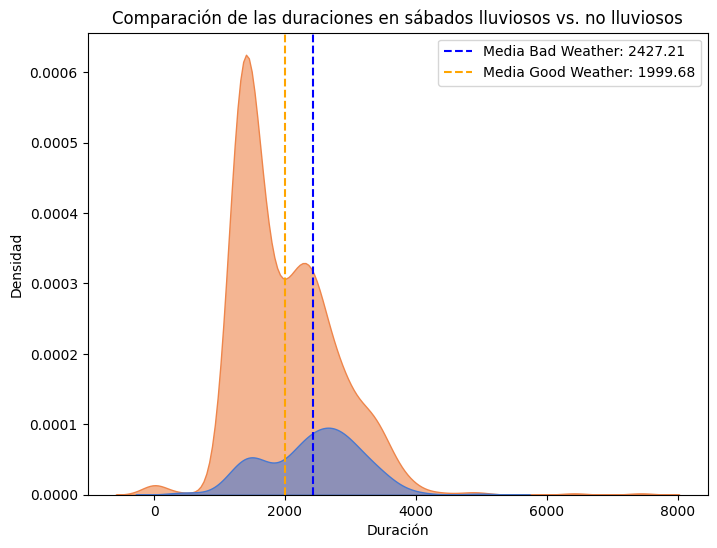

In [11]:
# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Weather': ['Bad Weather'] * len(bad_weather) + ['Good Weather'] * len(good_weather),
    'Duration': list(bad_weather) + list(good_weather)
})

# Calcular las medias de cada grupo
mean_bad_weather = bad_weather.mean()
mean_good_weather = good_weather.mean()

# Crear el gráfico de densidad sin barras
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Duration', hue='Weather', fill=True, palette="muted", alpha=0.6)

# Añadir líneas verticales para las medias
plt.axvline(mean_bad_weather, color='blue', linestyle='--', label=f'Media Bad Weather: {mean_bad_weather:.2f}')
plt.axvline(mean_good_weather, color='orange', linestyle='--', label=f'Media Good Weather: {mean_good_weather:.2f}')

# Añadir título y etiquetas
plt.title('Comparación de las duraciones en sábados lluviosos vs. no lluviosos')
plt.xlabel('Duración')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## Conclusión e Implicaciones para Zuber

En los viajes Loop hasta O’Hare: 

* Los viajes desde el Loop hasta O’Hare son significativamente más largos en sábados lluviosos (posiblemente debido a tráfico, reducción de velocidad por seguridad, o congestión en el aeropuerto).

En sus Operaciones:

* Aumentar la flota en sábados lluviosos para compensar tiempos de viaje más largos.

* Ofrecer incentivos a conductores para operar en estas condiciones.

Precios Dinámicos:

* Ajustar tarifas durante clima adverso para reflejar la mayor duración de viajes.

Comunicación:

* Informar a los usuarios sobre posibles retrasos en días lluviosos para mejorar la experiencia.
